<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/TeleCust(Q_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("teleCust.csv")
print(" Dataset loaded successfully!\n")
data.head()

 Dataset loaded successfully!



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
data.isnull()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# --- Step 3: Convert categorical data to numeric ---
for column in data.columns:
    if data[column].dtype == 'object':
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

print("Data after encoding categorical columns:\n", data.head())

Data after encoding categorical columns:
    region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [ ]:
# Split the dataset into features (X) and target (y) ---
# Assuming the last column is the category to predict
X = data.iloc[:, :-1]  # all columns except last
y = data.iloc[:, -1]   # last column

In [ ]:
# Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#  Scale the feature values (important for KNN) ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ---Create and train the KNN model ---
knn = KNeighborsClassifier(n_neighbors=18)  # Using the best K value found
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [ ]:
# --- Step 8: Predict on test data ---
y_pred = knn.predict(X_test)


In [ ]:
# --- Step 9: Evaluate the model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Model Accuracy: 38.00%

Confusion Matrix:
 [[26  8 18  8]
 [10  8 12  9]
 [11  7 31  6]
 [17  8 10 11]]

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.43      0.42        60
           2       0.26      0.21      0.23        39
           3       0.44      0.56      0.49        55
           4       0.32      0.24      0.28        46

    accuracy                           0.38       200
   macro avg       0.36      0.36      0.35       200
weighted avg       0.37      0.38      0.37       200



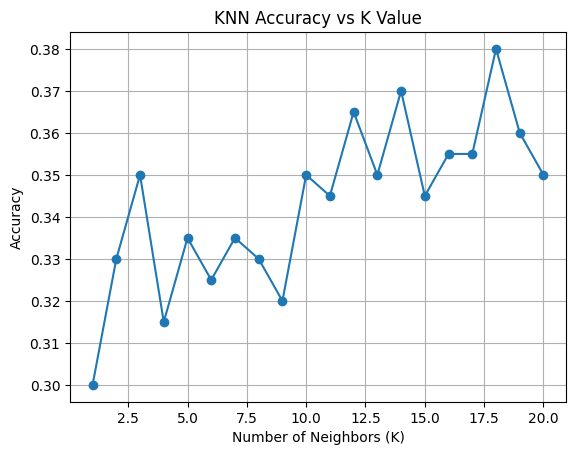

In [ ]:
# ---Try different K values to find the best one ---
accuracy_list = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_list.append(acc)

# ---  Plotting accuracy for different K values ---
plt.plot(k_values, accuracy_list, marker='o')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Find the best K and its accuracy
best_k_index = accuracy_list.index(max(accuracy_list))
best_k = k_values[best_k_index]
knn_acc = accuracy_list[best_k_index]


print(" Model Comparison Summary:")
print(f"KNN Accuracy (Best K={best_k}): {knn_acc * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")

Random Forest Accuracy: 36.00%

Classification Report (Random Forest):
               precision    recall  f1-score   support

           1       0.42      0.47      0.44        60
           2       0.30      0.28      0.29        39
           3       0.41      0.42      0.41        55
           4       0.24      0.22      0.23        46

    accuracy                           0.36       200
   macro avg       0.34      0.35      0.34       200
weighted avg       0.35      0.36      0.36       200

 Model Comparison Summary:
KNN Accuracy (Best K=18): 38.00%
Random Forest Accuracy: 36.00%
